Análisis exploratorios descartados en los estudios

In [1]:
import pandas as pd
import numpy as np #Librería numérica
import matplotlib.pyplot as plt
import psycopg2 #libreria para utilizar con postgres
import pandas.io.sql as psql

In [2]:
connection = psycopg2.connect("dbname=phmkeaeu user=phmkeaeu password=D-RiqEmcoViv8Sojo5L8ExxM9ufa0mkV host = trumpet.db.elephantsql.com, port= 5432")
dt = psql.read_sql('SELECT * FROM airbnb_list al', connection)
connection.close()
dt.head(3)

d:\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,index,Street,Neighbourhood Group Cleansed,City,State,Zipcode,Smart Location,Country Code,Latitude,Longitude,...,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Review Scores Rating,Cancellation Policy,Reviews per Month
0,0,"Madrid, Comunidad de Madrid 28005, Spain",Centro,Madrid,Comunidad de Madrid,28005,"Madrid, Spain",ES,40.407453,-3.707995,...,100.0,20.0,2,15,2,1125,30,96.0,moderate,5.11
1,1,"Madrid, Comunidad de Madrid 28012, Spain",Centro,Madrid,Comunidad de Madrid,28012,"Madrid, Spain",ES,40.408316,-3.705006,...,250.0,15.0,2,25,1,1125,97,81.0,strict,5.88
2,2,"Madrid, Comunidad de Madrid 28012, Spain",Centro,Madrid,Comunidad de Madrid,28012,"Madrid, Spain",ES,40.413722,-3.706823,...,NaN,25.0,1,0,1,1125,7,89.0,moderate,6.18


Análisis y resultados de Precio vs número de comentarios totales

In [23]:
dt[['Price', 'Bedrooms']].describe(include = "all")

,Price,Bedrooms
count,13198.000000,13184.000000
mean,65.924686,1.294372
std,56.008552,0.826831
min,9.000000,0.000000
25%,31.000000,1.000000
50%,52.000000,1.000000
75%,80.000000,2.000000
max,875.000000,10.000000


In [16]:
print('Correlación Pearson: ', dt['Bedrooms'].corr(dt['Price'], method='pearson'))
print('Correlación Rho de Spearman: ', dt['Bedrooms'].corr(dt['Price'], method='spearman'))
print('Correlación Tau de Kendall: ', dt['Bedrooms'].corr(dt['Price'], method='kendall'))

Correlación Pearson:  0.5256734286814845
Correlación Rho de Spearman:  0.4541657029308848
Correlación Tau de Kendall:  0.3568314611581143


In [24]:
print(dt.var())
covarianza=dt.cov()
covarianza.loc["Bedrooms" , "Price"]

index                   1.804261e+07
Latitude                4.012973e-04
Longitude               5.447932e-04
Accommodates            3.965396e+00
Bathrooms               3.596395e-01
Bedrooms                6.836488e-01
Beds                    2.284520e+00
Square Feet             2.989835e+05
Price                   3.136958e+03
Security Deposit        1.189339e+04
Cleaning Fee            6.728313e+02
Guests Included         1.173411e+00
Extra People            1.157781e+02
Minimum Nights          1.660823e+02
Maximum Nights          7.967384e+07
Number of Reviews       1.481129e+03
Review Scores Rating    8.090167e+01
Reviews per Month       3.570712e+00
dtype: float64


C:\Users\andre\AppData\Local\Temp\ipykernel_3724\1999869341.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(dt.var())


24.344771343935715

Text(0.5, 0, 'Precio')

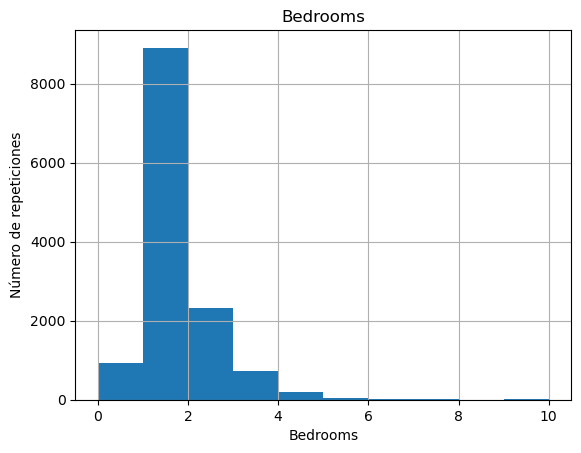

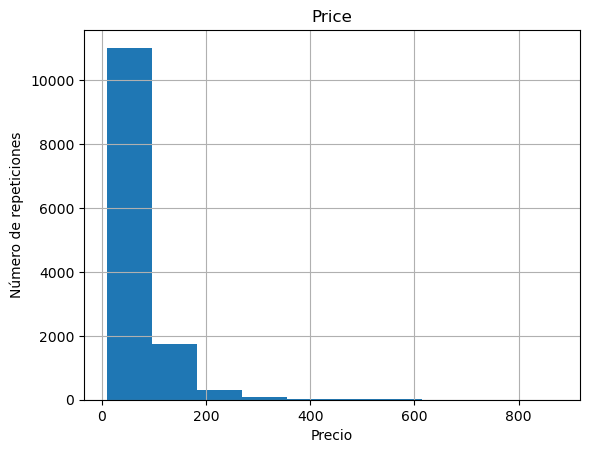

In [25]:
dt.hist('Bedrooms')
plt.ylabel('Número de repeticiones')
plt.xlabel('Bedrooms')
dt.hist('Price')
plt.ylabel('Número de repeticiones')
plt.xlabel('Precio')



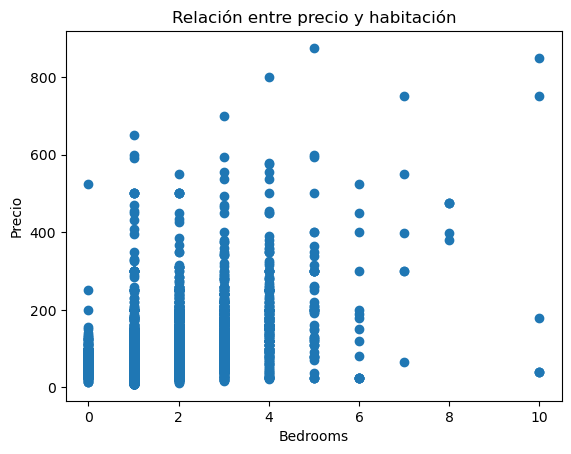

In [26]:
x = np.array(dt['Bedrooms'])
y = np.array(dt['Price'])
plt.scatter(x, y)
plt.title('Relación entre precio y habitación')
plt.ylabel('Precio')
plt.xlabel('Bedrooms')
plt.show()

In [27]:
print(x.shape)
print(y.shape)

(13207,)
(13207,)


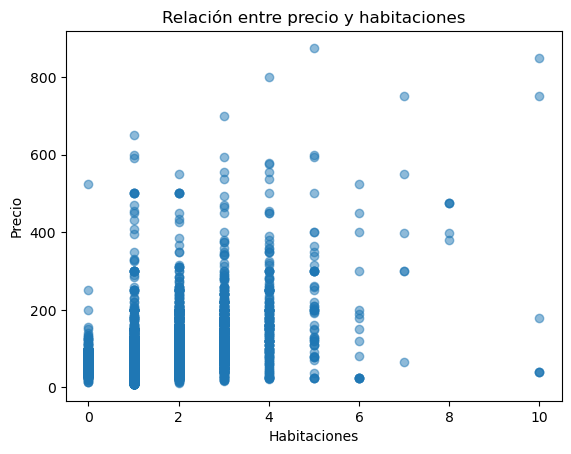

In [28]:

# Añadir columnas de unos para término independiente
plt.scatter(x,y, alpha = 0.5)
plt.title('Relación entre precio y habitaciones')
plt.xlabel('Habitaciones')
plt.ylabel('Precio')

x = np.array([np.ones(13207), x]).T #Debe cuadrar con el 

B = np.linalg.inv(x.T @ x) @ x.T @ y 

plt.plot([1, 250],[B[0]+ B[1] * 1, B[0] + B[1] * 250], c = "orange")
plt.show()